
## AIC and BIC in Time Series Analysis

**Akaike Information Criterion (AIC)** and **Bayesian Information Criterion (BIC)** are two widely used criteria for model selection in time series analysis. They help in comparing different models and choosing the one that best balances goodness of fit and model complexity.

#### Akaike Information Criterion (AIC)
The Akaike Information Criterion is a measure of the relative quality of a statistical model for a given set of data. It provides a means for model comparison, where a lower AIC indicates a better model.

**Formula:**
```
AIC = 2k - 2ln(L)
```

Where:
- `k` is the number of parameters in the model.
- `L` is the maximum value of the likelihood function for the model.

**Uses of AIC:**
1. **Model Selection:** AIC is used to compare different models. The model with the lowest AIC is generally preferred.
2. **Balancing Fit and Complexity:** AIC penalizes models for having more parameters, thus balancing the trade-off between the goodness of fit and model complexity.

**Interpretation:**
- **Lower AIC Value:** Indicates a better model.
- **Relative Measure:** AIC values are only meaningful when comparing different models on the same dataset.

#### Bayesian Information Criterion (BIC)
The Bayesian Information Criterion is similar to AIC but includes a stronger penalty for models with more parameters. BIC tends to favor simpler models compared to AIC.

**Formula:**
```
BIC = ln(n)k - 2ln(L)
```

Where:
- `n` is the number of data points.
- `k` is the number of parameters in the model.
- `L` is the maximum value of the likelihood function for the model.

**Uses of BIC:**
1. **Model Selection:** BIC is used for comparing different models, with a preference for the model with the lowest BIC.
2. **Penalty for Complexity:** BIC imposes a heavier penalty for the number of parameters than AIC, often leading to the selection of simpler models.

**Interpretation:**
- **Lower BIC Value:** Indicates a better model.
- **Relative Measure:** BIC values are meaningful when comparing models on the same dataset.

#### Practical Applications

**Example 1: ARIMA Model Selection**
When fitting ARIMA models to time series data, AIC and BIC can help determine the optimal order (p, d, q). For instance, if you are comparing ARIMA(1,1,1), ARIMA(2,1,1), and ARIMA(1,1,2) models:
- Compute the AIC and BIC for each model.
- Select the model with the lowest AIC and/or BIC value.

**Example 2: Seasonal Models**
In seasonal time series models like SARIMA, AIC and BIC can guide the choice of seasonal parameters (P, D, Q).

**Example 3: General Model Comparison**
For any set of competing time series models, you can compute AIC and BIC to select the most appropriate model that adequately captures the underlying process without overfitting.

### Key Points to Remember
- **AIC vs. BIC:** AIC tends to favor more complex models, while BIC favors simpler models due to its larger penalty term.
- **Model Comparison:** Both criteria are relative measures and should be used to compare models fitted to the same dataset.
- **No Absolute Thresholds:** There are no absolute values for AIC or BIC that indicate a "good" model; they are only useful for comparison purposes.

By understanding and applying AIC and BIC, you can make more informed decisions in time series model selection, ensuring a balance between model fit and complexity.



In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv

In [2]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [3]:
series = pd.read_csv('daily-total-female-births.csv',header=0, index_col=0).squeeze('columns')

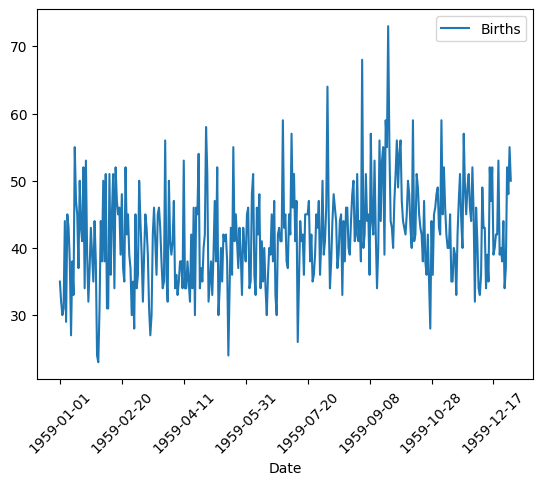

In [4]:
series.plot(legend=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

In [5]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [6]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


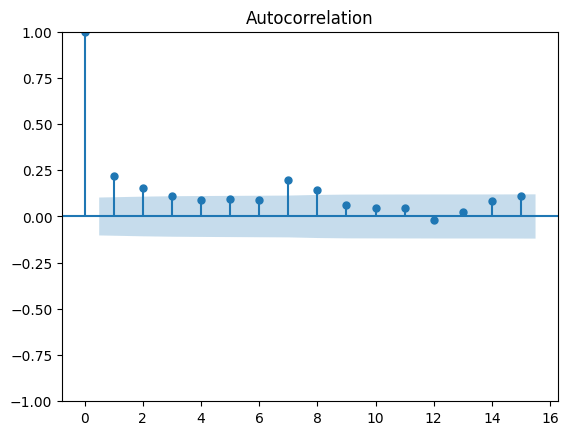

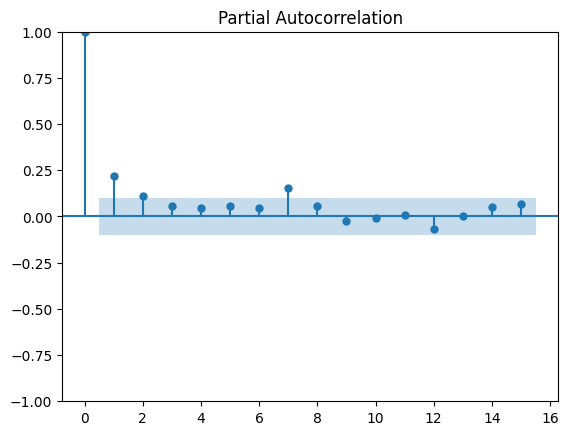

In [7]:
plot_acf(series, lags=15)
plot_pacf(series, lags=15)
plt.show()

# We can check AR(1), AR(2), AR(7)

In [8]:
ar_orders = [1, 2,7]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\

In [9]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(1): 2479.0806278346026
AIC for AR(2): 2476.363657107157
AIC for AR(7): 2472.7782626290154


In [10]:
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 2490.78031989535
BIC for AR(2): 2491.963246521487
BIC for AR(7): 2507.8773388112577


# If we treat this as a ARMA process

In [11]:
from itertools import product

p_values = range(1, 3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series, order=(p, 0, q))
    arma_model_fit = arma_model.fit()
    
    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic
    
    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\

In [12]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')

ARMA(1,1) - AIC: 2468.9057980335, BIC: 2484.50538744783
ARMA(1,2) - AIC: 2466.7240379001396, BIC: 2486.223524668052
ARMA(2,1) - AIC: 2466.2832664564266, BIC: 2485.782753224339
ARMA(2,2) - AIC: 2467.697857848296, BIC: 2491.097241969791


In [13]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [15]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0,date_parser=parser).squeeze('columns')
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12512\2806418540.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0,date_parser=parser).squeeze('columns')


In [16]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [17]:
perform_adf_test(series)


ADF Statistic: -7.162321
p-value: 0.000000


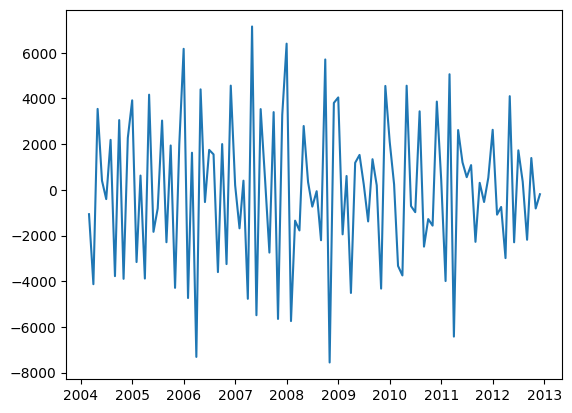

In [18]:
plt.plot(series)


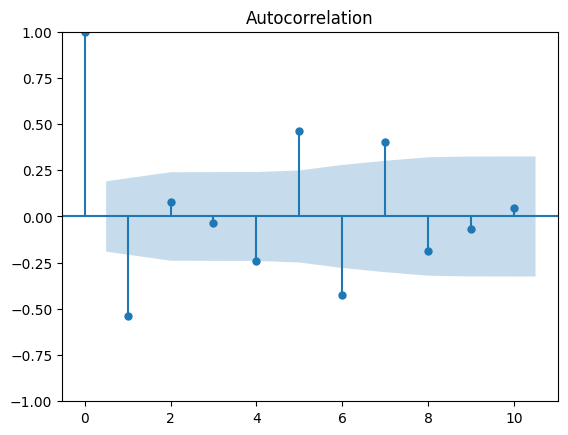

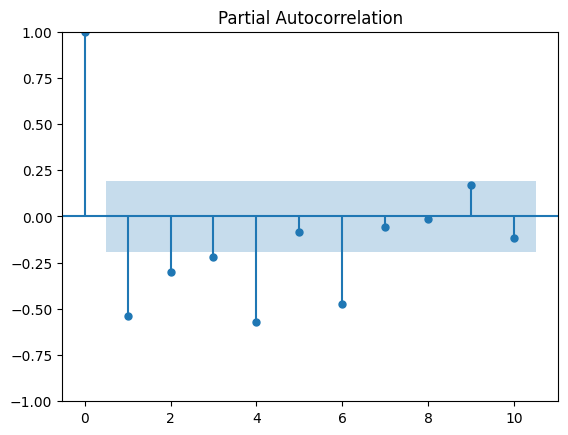

In [19]:
plot_acf(series, lags=10)
plot_pacf(series, lags=10)

plt.show()


In [20]:
ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit


In [21]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.609985266004
AIC for AR(6): 1899.6497442199582
AIC for AR(10): 1902.37654499951


In [22]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))


BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.5906198306764
BIC for AR(6): 1920.9572569728548
BIC for AR(10): 1934.337814128855
